**Problem 1** Find the positive real numbers $\tau_1$, $\tau_2$, $\omega_1$, and   $\omega_2$ so that
$$
\int_0^1 f(x)dx = \omega_1 f(\tau_1) + \omega_2 f(\tau_2)
$$
is exact for $f(x) = 1, x, x^2, x^3$. What is the error for $f(x) = x^4$? This is the beginning of the story of Gaussian quadrature

**Solution**: From the given $f(x)$, we obtain the following system:
$$
\begin{cases}
\omega_1 + \omega_2                 &= \int_0^1dx \\
\omega_1 \tau_1 + \omega_2 \tau_2   &= \int_0^1xdx \\
\omega_1 \tau_1^2 + \omega_2 \tau_2^2   &= \int_0^1x^2dx \\
\omega_1 \tau_1^3 + \omega_2 \tau_2^3   &= \int_0^1x^3dx \\
\end{cases}
$$
Which can be solved using Newton's Method.

In [ ]:
#Integration Function Using Simpson's Rule
import numpy as np

def Def_Integral(f, a, b):
  n = 100000
  h = (b - a )/n

  xk = [a]
  for i in range(1, n+1):
    xk.append(a+i*h)

  #Simpson's Composite Sum
  S = 0
  for k in range(1, n//2 + 1):
    S = S + (h/3)*(f(xk[2*k-2]) + 4*f(xk[2*k-1]) + f(xk[2*k]))

  return S

In [ ]:
#Solving for w_1, w_2, t_1, t_2 using Newtons Method in R^n

C0 = Def_Integral(lambda x: 1, 0, 1)
C1 = Def_Integral(lambda x: x, 0, 1)
C2 = Def_Integral(lambda x: x**2, 0, 1)
C3 = Def_Integral(lambda x: x**3, 0, 1)

#Function Vector
def F(w1, w2, t1, t2):
  return np.array([
      [w1 + w2 - C0],
      [w1*t1 + w2*t2 - C1],
      [w1*t1**2 + w2*t2**2 - C2],
      [w1*t1**3 + w2*t2**3 - C3]
  ])

#Jacobian Matrix
def JF(w1, w2, t1, t2):
  return np.array([
      [1, 1, 0, 0],
      [t1, t2, w1, w2],
      [t1**2, t2**2, 2*t1*w1, 2*t2*w2],
      [t1**3, t2**3, 3*t1**2*w1, 3*t2**2*w2]
  ])

#Initial Guess. Just any random number between 0 and 1
w_1k, w_2k, t_1k, t_2k = np.random.rand(4)

#Variable Matrix
Vars = np.array([
    [w_1k],
    [w_2k],
    [t_1k],
    [t_2k]
])

#Generating the Solutions
for k in range(5000):
  w_1k, w_2k, t_1k, t_2k = Vars[ : ,0]
  delta = np.linalg.inv(JF(w_1k, w_2k, t_1k, t_2k)) @ -F(w_1k, w_2k, t_1k, t_2k)
  Vars = Vars + delta

w_1, w_2, t_1, t_2 = Vars[ : ,0]

print(f'ω1 = {w_1:.8f}, ω2 = {w_2:.8f}, 𝜏1 = {t_1:.8f}, 𝜏2 = {t_2:.8f}')

ω1 = 0.50000000, ω2 = 0.50000000, 𝜏1 = 0.21132487, 𝜏2 = 0.78867513


Using the constants to estimate $\int_0^1 x^4dx$

In [ ]:
#Estimate of Integral of x^4 dx from 0 to 1
I_approx = w_1 * t_1**4 + w_2 * t_2**4
print(f'Approximate Integral = {I_approx: .8f}')

Approximate Integral =  0.19444444


In [ ]:
from scipy.integrate import quad

Integral = quad(lambda x: x**4, 0, 1)[0]
print(f'Python Computed Integral Value = {Integral: .8f}')

Python Computed Integral Value =  0.20000000


In [ ]:
Integral = w_1 * t_1**4 + w_2 * t_2**4
print(f'Absolute Error = {abs(Integral - Def_Integral(lambda x: x**4, 0, 1)): .8f}')

Absolute Error =  0.00555556


**Problem 2**. Bessel function of order 0 has the integral representation
$$
J_0(x) = \frac{1}{\pi}\int_0^\pi \cos(x\sin t)dt
$$
Use the Simpson's composite rule with $h = \frac{\pi}{100}$ to draw the graph of $J_0(x)$ on $0 \le x \le 10$.


**Solution**

In [ ]:
#Function for Simpson's Composite Sum Rule
def Integral_Simpson(f):
  a = 0
  b = np.pi
  n = 100
  h = (b - a )/n    #h = pi/100 at a = 0 and b = pi

  tk = [a]
  for i in range(1, n+1):
    tk.append(a+i*h)

  #Simpson's Composite Sum
  S = 0
  for k in range(1, n//2 + 1):
    S = S + (h/3)*(f(tk[2*k-2]) + 4*f(tk[2*k-1]) + f(tk[2*k]))

  return S

In [ ]:
#Defining J_0, Bessel function of order 0
def J_0(x):
  return (1/np.pi)*Integral_Simpson(lambda t: np.cos(x*np.sin(t)))

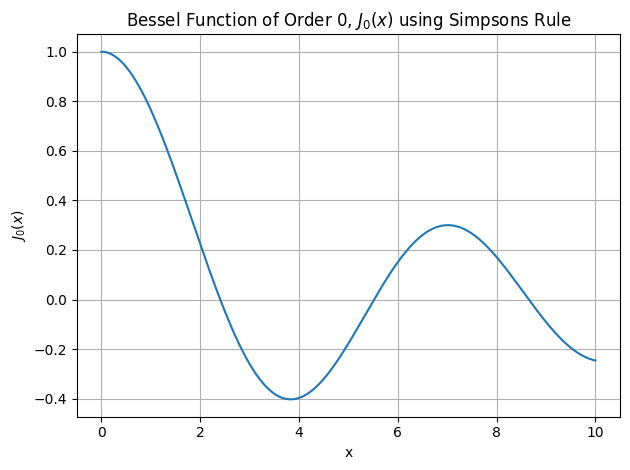

In [ ]:
import matplotlib.pyplot as plt

#Using x in the interval [0,10]
x_eval = np.linspace(0,10,1000)
y_eval = J_0(x_eval)

#Plotting
plt.plot(x_eval, y_eval)
plt.xlabel('x')
plt.ylabel(r'$J_0(x)$')
plt.grid(True)
plt.title(r'Bessel Function of Order 0, $J_0(x)$ using Simpsons Rule')
plt.tight_layout()
plt.show()

**Problem 3**. Define $F: [-2,2] → \mathbb{R}$ as
$$
F(x) = \int_0^{x^2 + 1} \left(e^{g(t)} - t \right)dt, \qquad  g(t) = \frac{t^2}{t^2 + 1}
$$
(a) Let $x \in \mathbb{R}$. Write a MATLAB/Python program that computes $F(x)$ using composite Milne's Rule.

(b) Use Newton's Method to find all the zeros of $F$ on $[-2,2]$

**Solution for (a)**: We show that Milne's Rule for the interval $[x_k, x_{k+4}]$ is given by



$$
I_k = h\left(\frac{7}{45} f(x_k) + \frac{32}{45} f(x_{k+1}) + \frac{12}{45} f(x_{k+2}) + \frac{32}{45} f(x_{k+3}) + \frac{7}{45} f(x_{k+4})\right)
$$

Recall the Newton - Cotes  formula for the weights of quadrature

$$
\lambda_i = \frac{1}{n}\int_0^n \prod_{j = 0, j\ne i}^n \frac{s-j}{i - j}ds
$$

Milne's Rule applies $n = 4$ to $\lambda_i$; hence, we have
$$
\begin{align}
\lambda_0 &= \frac{1}{4}\int_0^4 \prod_{j = 0, j\ne 0}^n \frac{s-j}{i - j}ds\\
          &=\frac{1}{4}\int_0^4 \frac{(s-1)(s-2)(s-3)(s-4)}{(0-1)(0-2)(0-3)(0-4)}ds\\
          &=\frac{1}{4}\cdot\frac{7}{45}\\
          \\
\lambda_1 &= \frac{1}{4}\int_0^4 \prod_{j = 0, j\ne 1}^n \frac{s-j}{i - j}ds\\
          &=\frac{1}{4}\int_0^4 \frac{(s-0)(s-2)(s-3)(s-4)}{(1-0)(1-2)(1-3)(1-4)}ds\\
          &=\frac{1}{4}\cdot\frac{32}{45}\\
          \\
\lambda_2 &= \frac{1}{4}\int_0^4 \prod_{j = 0, j\ne 2}^n \frac{s-j}{i - j}ds\\
          &=\frac{1}{4}\int_0^4 \frac{(s-0)(s-1)(s-3)(s-4)}{(2-0)(2-1)(2-3)(2-4)}ds\\
          &=\frac{1}{4}\cdot\frac{12}{45}\\
          \\
\lambda_3 &= \frac{1}{4}\int_0^4 \prod_{j = 0, j\ne 3}^n \frac{s-j}{i - j}ds\\
          &=\frac{1}{4}\int_0^4 \frac{(s-0)(s-1)(s-2)(s-4)}{(3-0)(3-1)(3-2)(3-4)}ds\\
          &=\frac{1}{4}\cdot\frac{32}{45}\\
          \\
\lambda_4 &= \frac{1}{4}\int_0^4 \prod_{j = 0, j\ne 4}^n \frac{s-j}{i - j}ds\\
          &=\frac{1}{4}\int_0^4 \frac{(s-0)(s-1)(s-2)(s-3)}{(4-0)(4-1)(4-2)(4-3)}ds\\
          &=\frac{1}{4}\cdot\frac{32}{45}
\end{align}
$$

Which means that for the interval $[x_k, x_{k+4}]$
$$
\int_{x_k}^{x_{k+4}}f(x)dx = 4h\cdot \frac{1}{4}\left(\frac{7}{45} f(x_k) + \frac{32}{45} f(x_{k+1}) + \frac{12}{45} f(x_{k+2}) + \frac{32}{45} f(x_{k+3}) + \frac{7}{45} f(x_{k+4})\right)
$$
or
$$
\int_{x_k}^{x_{k+4}}f(x)dx = h\left(\frac{7}{45} f(x_k) + \frac{32}{45} f(x_{k+1}) + \frac{12}{45} f(x_{k+2}) + \frac{32}{45} f(x_{k+3}) + \frac{7}{45} f(x_{k+4})\right)
$$

By summing from $k = 0$ to $k = n- 4$, we obtain

$$
\int_{x_a}^{b}f(x)dx = \sum_{k = 0}^{n-4}\int_{x_k}^{x_{k+4}}f(x)dx = \sum_{k = 0}^{n-4}h\left(\frac{7}{45} f(x_k) + \frac{32}{45} f(x_{k+1}) + \frac{12}{45} f(x_{k+2}) + \frac{32}{45} f(x_{k+3}) + \frac{7}{45} f(x_{k+4})\right)
$$
or
$$
\int_{a}^{b}f(x)dx  = \sum_{k = 0}^{n-4}h\left(\frac{7}{45} f(x_k) + \frac{32}{45} f(x_{k+1}) + \frac{12}{45} f(x_{k+2}) + \frac{32}{45} f(x_{k+3}) + \frac{7}{45} f(x_{k+4})\right)
$$

The following implements Milne's Rule in Python

In [ ]:
#Defining f(x)
def f(t):
  return np.exp(t**2 / (t**2 + 1)) - t

#The function F(x); Milne's Rule is used in the numerical integration part
def F(x):
  a = 0
  b = x**2 + 1
  n = 2000
  h = (b - a)/n


  #Constants for Milne's Rule
  C0 = 7/45
  C1 = 32/45
  C2 = 12/45
  C3 = 32/45
  C4 = 7/45

  xk = [a]
  for i in range(1, n+1):
    xk.append(a+i*h)

  #Milne's Composite Sum
  S = 0
  for k in range(0,n-3,4):
    S += h*(C0*f(xk[k]) + C1*f(xk[k+1]) + C2*f(xk[k+2]) + C3*f(xk[k+3])+ C4*f(xk[k+4]))
  return S

**Solution to (b)** From Fundamental Theorem of Calculus, we have

$$
\begin{align}
F'(x) &= \frac{d}{dx}\int_{0}^{x^2+1}\left(e^{g(t)} - t \right)dt\\
      &= \left(e^{g(t)} - t \right)\dfrac{dt}{dx} \Big|_{t = 0}^{t=x^2+1}\\
      &= \left(e^{g(x^2+1)} - (x^2+1) \right)(2x)
\end{align}
$$
By applying Newton's Method, we get
$$
x_{k+1} = x_k - \frac{F(x_k)}{F'(x_k)}
$$

The following python implementation find the roots of F(x) using Newton's Method

In [ ]:
def F_prime(x):
  t = x**2 + 1
  return (np.exp(t**2/(t**2 + 1)) - t)*(2*x)

#Newton's Method

def Newton_root(x0, tol):
  max_i=1000
  x1 = x0 - F(x0) / F_prime(x0)
  iteration = 0

  while abs(x1 - x0) > tol and iteration < max_i:
    x0 = x1
    x1 = x0 - F(x0) / F_prime(x0)
    iteration += 1

  return x1

In [ ]:
#Generating all roots of F in [-2,2]
roots = []
for x0 in np.linspace(-2,2,100):
  r = Newton_root(x0, 1e-7)
  roots.append(round(r, 5))

#Eliminate redundant elements using set(), then convert into list and finally sort the elements in the list
roots_unique = sorted(list(set(roots)))

In [ ]:
#Roots of F in [-2,2]
print(roots_unique)

[np.float64(-1.75358), np.float64(1.75358)]


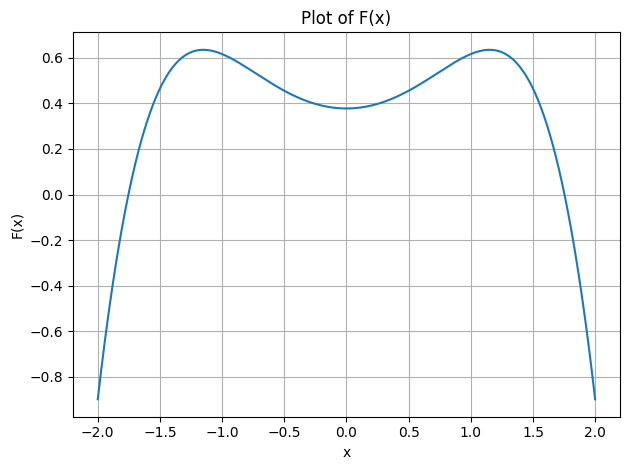

In [ ]:
#Plotting F(x) for reference

x_eval = np.linspace(-2,2,1000)
y_eval = F(x_eval)

plt.plot(x_eval, y_eval)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.title('Plot of F(x)')
plt.tight_layout()
plt.show()

From the plot, one roots lies near x = -2 & x = -1.5 and one roots lies near x = 1.5 & x = 2, which agrees with our python implementation of Newton's Method of finding roots

**Problem 4**. Consider the integral
$$
I = \int_0^1\int_0^1e^{x^2+y^2}dydx
$$
Use Monte Carlo integration to approximate I by sampling N = 100,000 random points $(X_i, Y_i)$ uniformly from the unit square $[0, 1]\times[0, 1]$, and computing
$$
I_N = \frac{1}{N}\sum_{i=1}^Ne^{X_i^2+Y_i^2}
$$

In [ ]:
#Number of samples
N = 100000

#Generating 100,000 random samples uniformly selected from the unit square [0, 1] x [0, 1]
sample_pts = np.random.uniform(0, 1, size = (N, 2))

S = 0
for i in range(N):
  X_i, Y_i = sample_pts[i]
  S += np.exp(X_i**2 + Y_i**2)

I_N = S/N

print(f'Integration using Monte Carlo method yields {I_N: .8f}')

Integration using Monte Carlo method yields  2.14236593


In [ ]:
#Checking our answer with scipy.integrate.dblquad
from scipy.integrate import dblquad

#defining the function
def f(x,y):
  return np.exp(x**2 + y**2)

#Integrating
I = dblquad(f, 0, 1, 0, 1)[0]

print(f'Integration using Built in python dblquad function yields {I: .8f}')

Integration using Built in python dblquad function yields  2.13935013


**Problem 5**. Use the implicit Euler scheme to solve equation (1.2) in **"Hopf Bifurcation of a Predator  - Prey Model with Time Delay"** by . Tirado, L. Armocera, and P. Sy, *Matimyas, 2016*. Use the parameters $a = 2.9, k_1 = 0.03, k_2 = 0.1, \gamma = 5, \delta_0 = 0.05, \delta_1 = 0.1, \tau = 0$. Use the initial values $x(0) = 0.03$ and $y(0) = 0.6$. Set $t \in [0, 200]$ and $N = 10^6$. Plot x vs. y vs. t

**Solution**: The equation (1.2) from **"Hopf Bifurcation of a Predator - Prey Model with Time Delay"** by . Tirado, L. Armocera, and P. Sy, *Matimyas, 2016*.
$$
\begin{cases}
\dfrac{dx(t)}{dt}
= x(t)\!\left[1 - k_1 x(t) - k_2 x(t)^2\right]
  - y(t)\,\dfrac{x(t)}{1 + a x(t)}, \\[10pt]
\dfrac{dy(t)}{dt}
= y(t)\!\left[-\delta_0 - \delta_1 y(t)
  + \gamma\,\dfrac{x(t-\tau)}{1 + a x(t-\tau)}\right].
\end{cases}
$$
Applying the parameters $a = 2.9, k_1 = 0.03, k_2 = 0.1, \gamma = 5, \delta_0 = 0.05, \delta_1 = 0.1, \tau = 0$ gives





$$
\begin{cases}
\dfrac{dx(t)}{dt} &= x(t) [1 - 0.03x(t) - 0.1(x(t))^2] - y(t)\dfrac{x(t)}{1+2.9x(t)}\\
\dfrac{dy(t)}{dt} &= y(t) \left[-0.05 - 0.1 y(t) +  \dfrac{5x(t)}{1+2.9x(t)} \right]\\
\end{cases}
$$

From backward Euler scheme,

$$
\begin{cases}
x_{n+1} &= x_n +  h\left(x_{n+1} [1 - 0.03x_{n+1} - 0.1x_{n+1}^2] - \dfrac{x_{n+1}y_{n+1}}{1+2.9x_{n+1}}\right)\\
y_{n+1} &= y_n + hy_{n+1} \left(-0.05 - 0.1 y_{n+1} + \dfrac{5x_{n+1}}{1+2.9x_{n+1}} \right)\\
\end{cases}
$$

For a given $x_n$, our system is reduced into 2 equations in two variablex $x_{n+1}$, and $y_{n+1}$. Since, we have a nonlinear system, we can employ Newton's method to iteratively solve for $(x_{n+1}, y_{n+1})$. Now, let the residual functions $F_1$ and $F_2$ be the following

$$
\begin{cases}
 F_1&= x_n -x_{n+1} +  h\left(x_{n+1}  - 0.03x_{n+1}^2 - 0.1x_{n+1}^3 - \dfrac{x_{n+1}y_{n+1}}{1+2.9x_{n+1}}\right)\\
 F_2&= y_n - y_{n+1} + h \left(-0.05y_{n+1} - 0.1 y_{n+1}^2 + \dfrac{5x_{n+1}y_{n+1}}{1+2.9x_{n+1}} \right)\\
\end{cases}
$$

The following python implementation yields the solution for our sytem of differential equations

In [ ]:
import sympy as sp

# Defining the symbols
x, y, xp, yp = sp.symbols('x y xp yp')   # xp, yp = x_n, y_n

# Initial Values at t = 0
x0 = 0.03
y0 = 0.6

# Discretization of t
N = 1000000
t_start = 0
t_end = 200
h = (t_end - t_start) / N

# f1 and f2 (right-hand side of ODE; depend on x_{n+1}, y_{n+1})
f1 = x*(1 - 0.03*x - 0.1*x**2) - x*y/(1 + 2.9*x)
f2 = -0.05*y - 0.1*y**2 + 5*x*y/(1 + 2.9*x)

# Residual F(x_{n+1}, y_{n+1}) from Backward Euler Scheme
F1_expr = x - (xp + h*f1)
F2_expr = y - (yp + h*f2)

# Jacobian Matrix Entries wrt x, y
dF1x = sp.lambdify((x, y, xp, yp), sp.diff(F1_expr, x), 'numpy')
dF1y = sp.lambdify((x, y, xp, yp), sp.diff(F1_expr, y), 'numpy')
dF2x = sp.lambdify((x, y, xp, yp), sp.diff(F2_expr, x), 'numpy')
dF2y = sp.lambdify((x, y, xp, yp), sp.diff(F2_expr, y), 'numpy')

# Lambdify F1, F2 to make them compatible with numpy
F1 = sp.lambdify((x, y, xp, yp), F1_expr, 'numpy')
F2 = sp.lambdify((x, y, xp, yp), F2_expr, 'numpy')

# Residual Function Vector F
def F(xv, yv, xv_prev, yv_prev):
  return np.array([
      [F1(xv, yv, xv_prev, yv_prev)],
      [F2(xv, yv, xv_prev, yv_prev)]
  ])

# Jacobian Matrix of the Function Vector F
def JF(xv, yv, xv_prev, yv_prev):
  return np.array([
      [dF1x(xv, yv, xv_prev, yv_prev), dF1y(xv, yv, xv_prev, yv_prev)],
      [dF2x(xv, yv, xv_prev, yv_prev), dF2y(xv, yv, xv_prev, yv_prev)]
  ])

# Initial guess container (will be overwritten each step)
Vars = np.array([[x0],
                 [y0]])

x_vals = [x0]
y_vals = [y0]
t_vals = [0]

# Generating the solutions Newton's Method
tol = 1e-09
for i in range(1, N + 1):
  # previous step values x_n, y_n
  x_prev = x_vals[-1]
  y_prev = y_vals[-1]

  # Start Newton from previous step as initial guess
  Vars = np.array([[x_prev],
                   [y_prev]])

  for k in range(50):
    x_1k, y_1k = Vars[:, 0]

    # Newton step: J * delta = -F
    delta = np.linalg.solve(JF(x_1k, y_1k, x_prev, y_prev), -F(x_1k, y_1k, x_prev, y_prev))

    #Updating the variable values
    Vars = Vars + delta

    # delta tolerance check
    if np.linalg.norm(delta) < tol:
        break

    x_1k, y_1k = Vars[:, 0]
    x_vals.append(x_1k)
    y_vals.append(y_1k)
    t_vals.append(i * h)

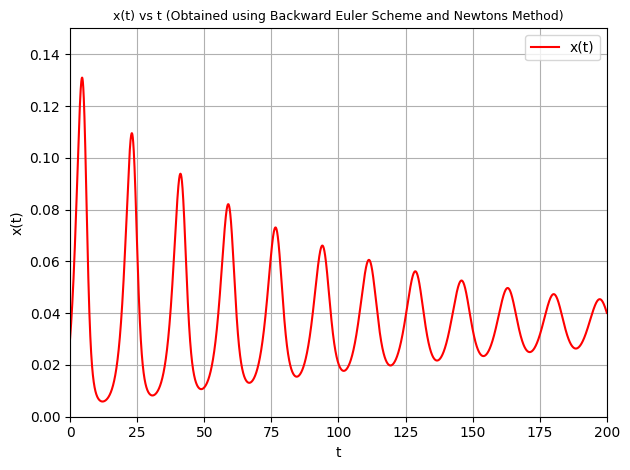

In [ ]:
#Plotting x(t) vs t
plt.plot(t_vals, x_vals, color='red', label='x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim(0,200)
plt.ylim(0,0.15)
plt.grid(True)
plt.title('x(t) vs t (Obtained using Backward Euler Scheme and Newtons Method)', fontsize = 9)
plt.legend()
plt.tight_layout()
plt.show()

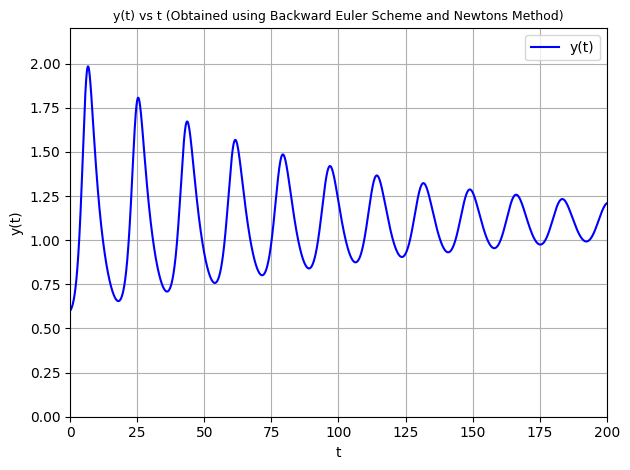

In [ ]:
#Plotting y(t) vs t
plt.plot(t_vals, y_vals, color='blue', label='y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.xlim(0,200)
plt.ylim(0,2.2)
plt.grid(True)
plt.title('y(t) vs t (Obtained using Backward Euler Scheme and Newtons Method)', fontsize = 9)
plt.legend()
plt.tight_layout()
plt.show()

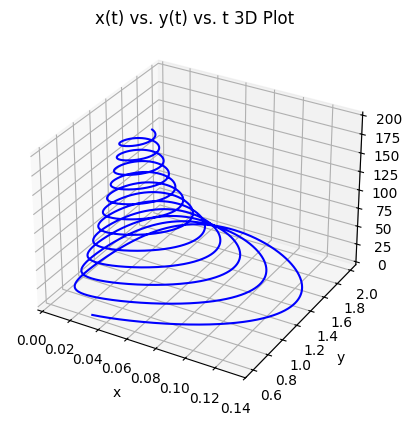

In [ ]:
#3D Plot of x(t) vs. y(t) vs. t using Backward Euler Scheme and Newton's Method
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.plot(x_vals, y_vals, t_vals, color='blue')
ax.set_title("x(t) vs. y(t) vs. t 3D Plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("t")
plt.show()



To double check the results, we can use the built - in python function differential equation solve $\texttt{scipy.integrate.solve_ivp}$

In [ ]:
#Double check using solve_ivp function from scipy.integrate n Python

from scipy.integrate import solve_ivp

def f(t, z):
    x, y = z  #vector of variables x, and y
    dxdt = x*(1 - 0.03*x - 0.1*x**2) - y*x /(1+2.9*x)
    dydt = y*(-0.05 - 0.1*y + 5*x/(1+2.9*x))
    return [dxdt, dydt]

# Initial conditions
x_0 = 0.03
y_0 = 0.6
z_0 = [x_0, y_0]  #initial value vector

# Time interval
t_0 = 0.0
t_N = 200.0
N = 10000
h = (t_N - t_0) / N

# Solve the system
solution = solve_ivp(f, t_span=(t_0, t_N), y0 = z_0, dense_output=True, max_step=h)

t_values = solution.t
x_values = solution.y[0]
y_values = solution.y[1]

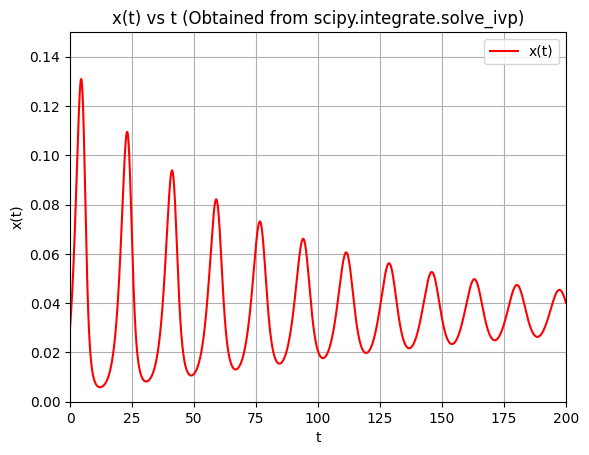

In [ ]:
#Plotting x(t) vs t
plt.plot(t_values, x_values, color='red', label='x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim(0,200)
plt.ylim(0,0.15)
plt.grid(True)
plt.title('x(t) vs t (Obtained from scipy.integrate.solve_ivp)')
plt.legend()
plt.show()

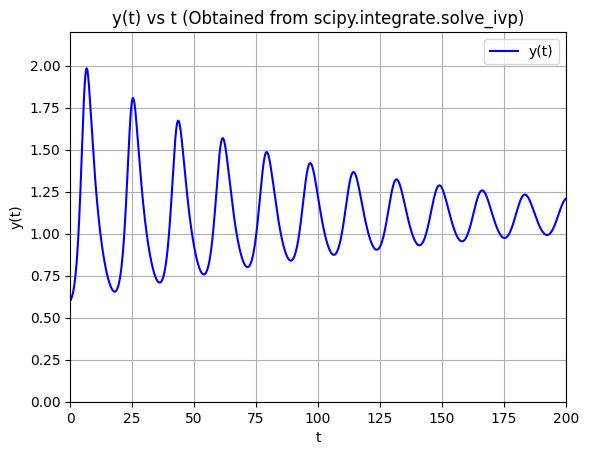

In [ ]:
#Plotting y(t) vs t
plt.plot(t_values, y_values, color='blue', label='y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.xlim(0,200)
plt.ylim(0,2.2)
plt.grid(True)
plt.title('y(t) vs t (Obtained from scipy.integrate.solve_ivp)')
plt.legend()
plt.show()

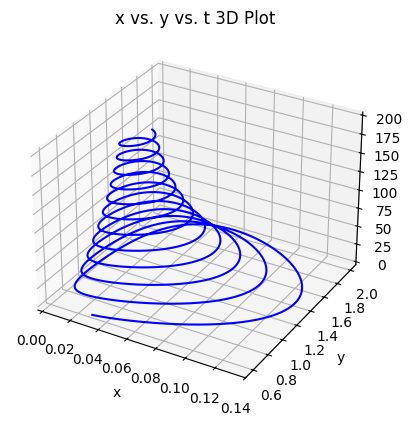

In [ ]:
#3D Plot of x(t) vs. y(t) vs. t using scipy.integrate.solve_ivp
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.plot(x_values, y_values, t_values, color='blue')
ax.set_title("x vs. y vs. t 3D Plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("t")
plt.show()

**Problem 6**. Use Runge - Kutta of order 4 to replicate the figures in the upper panel of Figure (3) $(CRP = 3 \times 10^{-3} \text{mg/mL})$ by solving equation (3) in **"A Model of Vascular Refilling and Inflammation"** by V.M.Paguio, F. Kappel and P. Kotanko, *Mathematical Biosciences, 2018*. Use parameters from Table A.18 and A.19 and the initial values for the case $CRP_{low}$ in Table A.20 found in the appendix. Set $t \in [0,60]$ and $N = 500$.

**Solution**: We have the following system of differential equations:
$$
\begin{cases}
\dfrac{dV_p}{dt}
= J_v(t) +\kappa - J_{UF}(t) \\[9pt]
\dfrac{dc_p}{dt}
= \dfrac{J_s(t) - c_p(t)(J_v(t) +\kappa - J_{UF}(t))}{V_p(t)}\\[9pt]
\dfrac{dV_i}{dt}
= -J_v(t) -\kappa\\[9pt]
\dfrac{dc_i}{dt} = \dfrac{-J_s(t) + c_i(t)(J_v(t) +\kappa)}{V_i(t)}\\[9pt]
\end{cases}
$$


Before we solve the system of differential equations, we will be needing the following (together with the constants from Table A.18, Table A.19, and Table A.20)
$$
\begin{align}
L_p([CRP]) &
= a+\dfrac{L}{1+e^{-d [CRP])}}\\
\rho([CRP])&
=be^{-\left( \frac{[CRP]}{c}\right)^2}\\
J_v(t) &
= L_p([CRP])  ( \rho([CRP])  (\pi_p(t) - \pi_i(t)) - (P_c - P_i))\\
\pi_p(t) &
=a_{p,1}c_p(t) + a_{p,2}(c_p(t))^2\\
x(t)&
= \dfrac{J_v(t)(1 - \rho([CRP]))}{P_s}\\
J_s(t)&
=
\begin{cases}
J_v(t)(1 - \rho([CRP]))\left(c_i(t) - \dfrac{c_p(t) - c_p(t)}{e^{x(t)}-1} \right) + \alpha \kappa && , J_v(t) \ge 0\\
-P_s(c_p(t) - c_p(t))  + \alpha \kappa &&, J_v(t) = 0\\
J_v(t)(1 - \rho([CRP]))\left(c_p(t) - \dfrac{c_p(t) - c_p(t)}{e^{x(t)}-1} \right) + \alpha \kappa &&, J_v(t) \le 0
\end{cases}
\end{align}
$$

Observe that from the above equations $J_v(t)$ and $J_s(t)$ can be easily expressed as
$$
\begin{align}
J_v(t) &= J_v(c_p(t), c_i(t))\\
J_s(t) &= J_s(c_p(t), c_i(t))
\end{align}
$$
Which means the original system of differential equations can be written as
$$
\begin{cases}
\dfrac{dV_p}{dt}
= J_v(c_p(t), c_i(t)) +\kappa - J_{UF}(t) \\[9pt]
\dfrac{dc_p}{dt}
= \dfrac{J_s(c_p(t), c_i(t)) - c_p(t)(J_v(c_p(t), c_i(t)) +\kappa - J_{UF}(t))}{V_p(t)}\\[9pt]
\dfrac{dV_i}{dt}
= -J_v(c_p(t), c_i(t)) -\kappa\\[9pt]
\dfrac{dc_i}{dt} = \dfrac{-J_s(c_p(t), c_i(t)) + c_i(t)(J_v(c_p(t), c_i(t)) +\kappa)}{V_i(t)}\\[9pt]
\end{cases}
$$
with $J_{UF}(t)$ given by
$$
J_{UF}(t) =
\begin{cases}
0 && \text{for}&0  \le t \le 20  & \text{and}& 40 \le t \le 60\\
30 &&\text{for} & 20 \le t \le 40
\end{cases}
$$

The following python implementation solvs the system of differential equations using RK4

In [ ]:
# Constants from Table A.19
a = -9.70
L = 22.35
d = 66.23
b = 0.9058
c = 0.0278

# Constants from Table A.18
Pc = 21.1
Pi = 2.0
Ps= 0.45
ap1 = 0.1752
ap2 = 0.0028
ai1 = 0.2336
ai2 = 0.0034
alpha = 24.612
kappa = 1.5

# CRP low initial conditions (Table A.20)
CRP = 0.00385
Vp0 = 5352.5
cp0 = 73.5
Vi0 = 16753.0
ci0 = 24.5

In [ ]:
# Aux functions

# Constant function Lp at constant CRP
def Lp():
  return a + (L / (1 + np.exp(-d * CRP)))

# Constant function sigma at constant CRP
def sigma():
  return b * np.exp(-((CRP / c)**2))

# pi_p as a function of c_p
def pi_p(c_p):
  return ap1 * c_p + ap2 * c_p**2

# pi_i as a function of c_i
def pi_i(c_i):
  return ai1 * c_i + ai2 * c_i**2

# Jv as a function of c_p and c_i
def Jv(c_p, c_i):
  p_i = pi_i(c_i)
  p_p = pi_p(c_p)
  return Lp() * (sigma() * (p_p - p_i) - (Pc - Pi))

# x as a function of c_p and c_i
def x(c_p, c_i):
  J_v = Jv(c_p, c_i)
  return (J_v * (1 - sigma())) / Ps

# Js as a function of c_p and c_i
def Js(c_p, c_i):
  J_v = Jv(c_p, c_i)
  x_ = x(c_p, c_i)

  if J_v > 0:
      return J_v * (1 - sigma()) * (c_i - ((c_p - c_i) / (np.exp(x_) - 1))) + alpha * kappa
  elif abs(J_v) < 1e-7:  # single precision zero
      return -Ps * (c_p - c_i) + alpha * kappa
  else:  # J_v < 0
      return J_v * (1 - sigma()) * (c_p - ((c_p - c_i) / (np.exp(x_) - 1))) + alpha * kappa

# Piecewise function Juf(t)
def Juf(t):
  if 0 <= t <= 20 or 40 <= t <= 60:
      return 0.0
  elif 20 < t < 40:
      return 30.0
  else:
      print(f"t = {t} is out of bounds. Make sure that t in [0,60]")
      return 0.0

In [ ]:
# System of Differential Equations (Equation 3)
def SystemDE(t, y):
  # y is a vector: [Vp, cp, Vi, ci]
  Vp, cp, Vi, ci = y
  Jv_val  = Jv(cp, ci)
  Js_val  = Js(cp, ci)
  Juf_val = Juf(t)

  # ODE system
  dVp_dt = Jv_val + kappa -  Juf_val
  dcp_dt = (Js_val - cp * (Jv_val + kappa - Juf_val)) / Vp
  dVi_dt = -Jv_val - kappa
  dci_dt = (-Js_val + ci * (Jv_val + kappa)) / Vi

  # Return as NumPy array (as float) for RK4 operations
  return np.array([dVp_dt, dcp_dt, dVi_dt, dci_dt], dtype=float)

In [ ]:
# Runge -Kutta 4th Order

#RK4 for single step
def RK4single_step(func, dt, t0, y0):
  f1 = func(t0, y0)
  f2 = func(t0 + dt/2, y0 + (dt/2)*f1)
  f3 = func(t0 + dt/2, y0 + (dt/2)*f2)
  f4 = func(t0 + dt,   y0 + dt*f3)

  y1 = y0 + (dt/6)*(f1 + 2*f2 + 2*f3 + f4)
  return y1

#RK4 Solver
def RK4_IVPSolver(func, t_start, t_end, y0, N=500):
  y0 = np.asarray(y0, dtype=float) #formatting the y0 vector as an array
  h = (t_end - t_start) / N  # step size
  t_vals = np.empty(N + 1)  #
  Y = np.empty((N + 1, len(y0)))

  # initial conditions
  t = t_start
  y = y0.copy()      # this keeps y0 unchanged
  t_vals[0] = t
  Y[0] = y

  for n in range(N):
    y = RK4single_step(func, h, t, y)
    t = t + h
    t_vals[n + 1] = t
    Y[n + 1] = y

  return t_vals, Y

In [ ]:
#Initial Conditions at t = 0
y0 = [Vp0, cp0, Vi0, ci0]

# Solving DE from the RK ODE IVP Solver
t_vals, Y = RK4_IVPSolver(SystemDE, 0.0, 60.0, y0, N=500)

# Extract variables
Vp = Y[:, 0]
cp = Y[:, 1]
Vi = Y[:, 2]
ci = Y[:, 3]

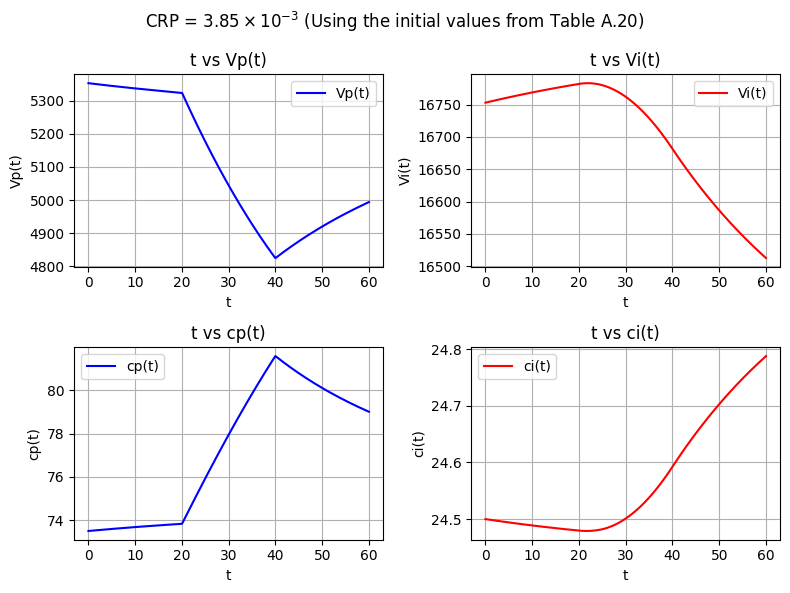

In [ ]:
#Plotting Vp(t) vs t
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

(ax1,ax2), (ax3,ax4) = axes

ax1.plot(t_vals, Vp, color='blue', label='Vp(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('Vp(t)')
ax1.set_title('t vs Vp(t)')

ax2.plot(t_vals, Vi, color='red', label='Vi(t)')
ax2.set_xlabel('t')
ax2.set_ylabel('Vi(t)')
ax2.set_title('t vs Vi(t)')

ax3.plot(t_vals, cp, color='blue', label='cp(t)')
ax3.set_xlabel('t')
ax3.set_ylabel('cp(t)')
ax3.set_title('t vs cp(t)')

ax4.plot(t_vals, ci, color='red', label='ci(t)')
ax4.set_xlabel('t')
ax4.set_ylabel('ci(t)')
ax4.set_title('t vs ci(t)')

for row in axes:
  for ax in row:
    ax.grid(True)
    ax.legend()
fig.suptitle(r'CRP = $3.85 \times 10^{-3}$ (Using the initial values from Table A.20)')
plt.tight_layout()
plt.show()

In [ ]:
# CRP low initial conditions (Table A.18)
CRP = 0.003
Vp0 = 4000
cp0 = 73.4940
Vi0 = 17200
ci0 = 24.5595

In [ ]:
#Initial Conditions at t = 0
y0 = [Vp0, cp0, Vi0, ci0]

# Solving DE from the RK ODE IVP Solver
t_vals, Y = RK4_IVPSolver(SystemDE, 0.0, 60.0, y0, N=500)

# Extract variables
Vp = Y[:, 0]
cp = Y[:, 1]
Vi = Y[:, 2]
ci = Y[:, 3]

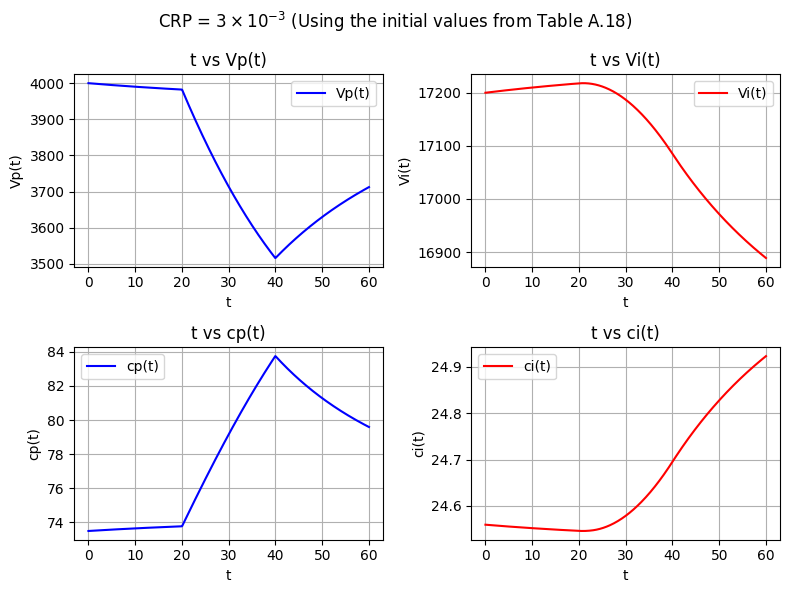

In [ ]:
#Plotting Vp(t) vs t
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

(ax1,ax2), (ax3,ax4) = axes

ax1.plot(t_vals, Vp, color='blue', label='Vp(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('Vp(t)')
ax1.set_title('t vs Vp(t)')

ax2.plot(t_vals, Vi, color='red', label='Vi(t)')
ax2.set_xlabel('t')
ax2.set_ylabel('Vi(t)')
ax2.set_title('t vs Vi(t)')

ax3.plot(t_vals, cp, color='blue', label='cp(t)')
ax3.set_xlabel('t')
ax3.set_ylabel('cp(t)')
ax3.set_title('t vs cp(t)')

ax4.plot(t_vals, ci, color='red', label='ci(t)')
ax4.set_xlabel('t')
ax4.set_ylabel('ci(t)')
ax4.set_title('t vs ci(t)')

for row in axes:
  for ax in row:
    ax.grid(True)
    ax.legend()
fig.suptitle(r'CRP = $3 \times 10^{-3}$ (Using the initial values from Table A.18)')
plt.tight_layout()
plt.show()

**Problem 7**. Derive the two -step Adams - Moulton formula
$$
y_{i+1} = y_{i} + \dfrac{h}{12}(5f_{i+1} + 8f_i -f_{i-1})
$$

**Solution**: We start with the ODE $y'(t) = f(t,y(t))$,and suppose what we have is $t = t_n$ . Suppose, we want to estimate the point $(t_{n+1}, y_{n+1})$ then by integrating from $t_{n}$ to $t_{n+1}$, we have
<br><br>
$$
\begin{align}
y'(t) &= f(t,y(t)) \\
\int_{t_n}^{t_{n+1}}y(t)dt  &= \int_{t_n}^{t_{n+1}}f(t,y(t))dt\\
y(t_{n+1}) - y(t_{n})  &= \int_{t_n}^{t_{n+1}}f(t,y(t))dt\\
y(t_{n+1})   &=y(t_{n}) + \int_{t_n}^{t_{n+1}}f(t,y(t))dt\\
\end{align}
$$
<br>
From the formula of Adams - Moulton,
<br><br>
$$
y_{i+1} = y_{i} + \dfrac{h}{12}(5f_{i+1} + 8f_i -f_{i-1})
$$
<br><br>
We can intuitively check the polynomial interpolation at the points $(t_{n-1}, f(t_{n-1}, y_{n-1}))$, $(t_{n}, f(t_{n}, y_{n}))$, and $(t_{n+1}, f(t_{n+1}, y_{n+1}))$. By Lagrange polynomial interpolation, we have
<br>
$$
P(t) = \dfrac{(t - t_{n})(t - t_{n+1})}{(t_{n-1} - t_{n})(t_{n-1} - t_{n+1})}f(t_{n-1}, y_{n-1}) + \dfrac{(t - t_{n-1})(t - t_{n+1})}{(t_{n} - t_{n-1})(t_{n} - t_{n+1})}f(t_{n}, y_{n}) + \dfrac{(t - t_{n-1})(t - t_{n})}{(t_{n+1} - t_{n-1})(t_{n+1} - t_{n})}f(t_{n+1}, y_{n+1})
$$
<br>
Now, observe that if we let $t_k = a + kh$, then the quotient $\frac{t_s - t_j}{t_i - t_j}$ becomes
<br><br>
$$
\dfrac{t_s - t_j}{t_i - t_j} = \dfrac{(a + sh) - (a + jh)}{(a + ih) - (a + kh)} = \dfrac{s - j}{i - j}
$$
<br>
Therefore, by letting $t = t_s$, $f_{n-1}=f(t_{n-1}, y_{n-1})$ , $f_{n}=f(t_{n}, y_{n})$, $f_{n+1}=f(t_{n+1}, y_{n+1})$we obtain
<br><br>
$$
P(t) = \dfrac{(s - n)(s - (n+1))}{((n-1) - n)((n-1) - (n+1))}f_{n-1} + \dfrac{(s - (n-1))(s - (n+1))}{(n - (n-1))(n - (n+1))}f_{n} + \dfrac{(s - (n-1))(s - n)}{((n+1) - (n-1))((n+1) - n)}f_{n+1}
$$
<br>
or
<br>
$$
P(t) = \dfrac{(s - n)(s - (n+1))}{2}f_{n-1} + \dfrac{(s - (n-1))(s - (n+1))}{-1}f_{n} + \dfrac{(s - (n-1))(s - n)}{2}f_{n+1}\\
$$
<br>


Now,
<br>
$$
\int_{t_n}^{t_{n+1}}f(t,y(t))dt ≈ \int_{t_n}^{t_{n+1}}P(t)dt
$$
<br>
or
<br>
$$
\int_{t_n}^{t_{n+1}}f(t,y(t))dt ≈ \int_{s=n}^{s=n+1}\left(\dfrac{(s - n)(s - (n+1))}{2}f_{n-1} + \dfrac{(s - (n-1))(s - (n+1))}{-1}f_{n} + \dfrac{(s - (n-1))(s - n)}{2}f_{n+1}\right)hds
$$
<br>

By change of variables, let $x = s - n$, then we have
<br><br>
$$
\begin{align}
h\int_{x=o}^{x=1}\left(\dfrac{(x)(x-1)}{2}f_{n-1} + \dfrac{(x+1)(x-1))}{-1}f_{n} + \dfrac{(x+1)(x)}{2}f_{n+1}\right)dx &= h\left(-\dfrac{1}{12}f_{n-1} +  \dfrac{2}{3}f_{n}+ \dfrac{5}{12}f_{n+1}\right)\\
&=\dfrac{h}{12}\left(-f_{n-1} +  8f_{n}+ 5f_{n+1}\right)
\end{align}
$$
<br>
Hence,
$$
\begin{align}
y(t_{n+1})   &=y(t_{n}) + \int_{t_n}^{t_{n+1}}f(t,y(t))dt\\
             &=y(t_{n}) + \dfrac{h}{12}\left(-f_{n-1} +  8f_{n}+ 5f_{n+1}\right)
\end{align}
$$
<br>
or
<br>
$$
y_{n+1} =y_{n} + \dfrac{h}{12}\left(-f_{n-1} +  8f_{n}+ 5f_{n+1}\right)
$$
<br>
Which is what we wanted

**Problem 8**. Use Shooting method ,to solve the following boundary value problem
$$
\begin{align}
x''(t) - 2x'(t) + x(t) = 0, &&x(0) = 1, &&x(1) = e
\end{align}
$$

**Solution**: We let $u(t) = x'(t)$, then we obtain the following system of differential equations
<br>
$$
\begin{cases}
x'(t) &= u(t)\\
u'(t) &= 2u(t) - x(t)
\end{cases}
$$
From the given, we have the initial condition $x(0) = 1$. Let the other initial condition be $u(0) = k$, then we run implement secant method to find the roots of  $f_{\text{shoot}}(x_{\text{shoot}}(0)) = \Big |x_{\text{shoot}}(1) \Big |_{x_{\text{shoot}}(0)} - x(1)\Big | $, where $x_{\text{shoot}}(t)$ is the solution we generate for our guess of $k$

In [ ]:
#System of Differential Equations

def ODESystem(t,y):
  #packing the variables x, and u into vector y; y = [x,u]
  x, u = y

  #Sytem of ODE
  dx_dt = u
  du_dt = 2*u - x

  return np.array([dx_dt, du_dt], dtype = 'float')

In [ ]:
#Initial conditions
x0 = 1
#We will find u0 using secant method

In [ ]:
#Shooting Method

def shoot_f(u0):
  y0 = [x0, u0]

  t_start = 0
  t_end = 1
  N = 100
  # Solving DE from the RK ODE IVP Solver
  t_vals, Y = RK4_IVPSolver(ODESystem, t_start, t_end, y0, N)

  # Extract variables
  x = Y[:, 0]

  return x[-1] - np.exp(1)

#Secant method is used for root finding in Shooting Method Scheme
def root_secant(shoot_f, x0, x1, tol, max_i):
  iteration = 0
  f0 = shoot_f(x0)
  f1 = shoot_f(x1)
  x2 = x1 - shoot_f(x1) / ((f1 - f0)/(x1 - x0))
  f2 = shoot_f(x2)

  while abs(f2) > tol and iteration < max_i:
   f0 = shoot_f(x0)
   f1 = shoot_f(x1)
   x2 = x1 - shoot_f(x1) / ((f1 - f0)/(x1 - x0))
   f2 = shoot_f(x2)
   iteration += 1

   #Update variables
   x1 = x2
   x0 = x1

  return x2


# Parameters for root finding
tol = 1e-8
max_i = 500

# Try multiple initial guesses across interval; store/print solutions
u_init = -1.0
u_end = 50

sol_IV = []
for u_0 in np.linspace(u_init, u_end, 100):
 x_0 = u_init
 x_1 = u_end
 u_calc = root_secant(shoot_f, x_0, x_1, tol, max_i)
if shoot_f(u_calc) < tol:
  sol_IV.append(u_calc)

for var in sol_IV:
  print(f'correct u0 = {var: .8f}')

correct u0 =  1.00000000


In [ ]:
#Solving the Differential Equation
for u0 in sol_IV:
  y0 = [x0, u0]

  t_start = 0
  t_end = 1
  N = 100
  # Solving DE from the RK ODE IVP Solver
  t_vals, Y = RK4_IVPSolver(ODESystem, t_start, t_end, y0, N)

  # Extract variables
  x = Y[:, 0]

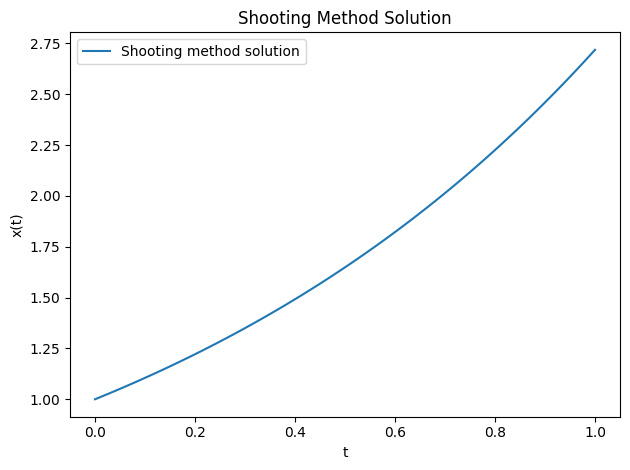

In [ ]:
#Plotting the solution
plt.plot(t_vals, x, label = 'Shooting method solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Shooting Method Solution')
plt.legend()
plt.tight_layout()
plt.show()

In contrast the solution to the DE is given by $x(t) = e^t$.

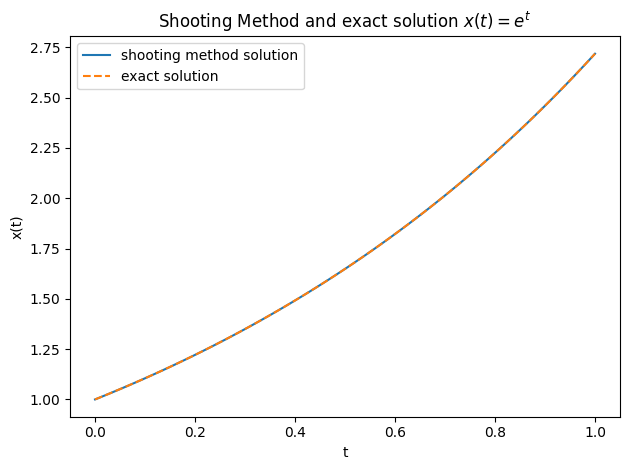

In [ ]:
#Plotting the solution
plt.plot(t_vals, x, label = 'shooting method solution')
plt.plot(t_vals, np.exp(t_vals), '--', label = 'exact solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Shooting Method and exact solution $x(t) = e^t$')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#We check using the python built - in function scipy.integrate.solve_ivp
#We solve the shooting problem by defining the shoot function, then solve it by scipy.optimize.root_scalar

from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar


#Shoot function
def shoot(u0_guess):
    sol = solve_ivp(ODESystem, (0,1), [1, u0_guess], dense_output=True)
    x1 = sol.y[0,-1]
    return x1 - np.exp(1)

result = root_scalar(shoot, bracket=[-1,5]) #Root solver for our shooting function
u_sol = result.root
print(f"Correct u(0) = {u_sol: .8f}")

Correct u(0) =  0.99998338


In [ ]:
#Generating the solution using scipy.integrate.solve_ivp
# Initial conditions
x_0 = 1
u_0 = u_sol
z_0 = [x_0, u_0]  #initial value vector

# Time interval
t_0 = 0.0
t_N = 1.0
N = 10000
h = (t_N - t_0) / N

# Solve the system
solution = solve_ivp(ODESystem, t_span=(t_0, t_N), y0 = z_0, dense_output=True, max_step=h)

t_values = solution.t
x_values = solution.y[0]

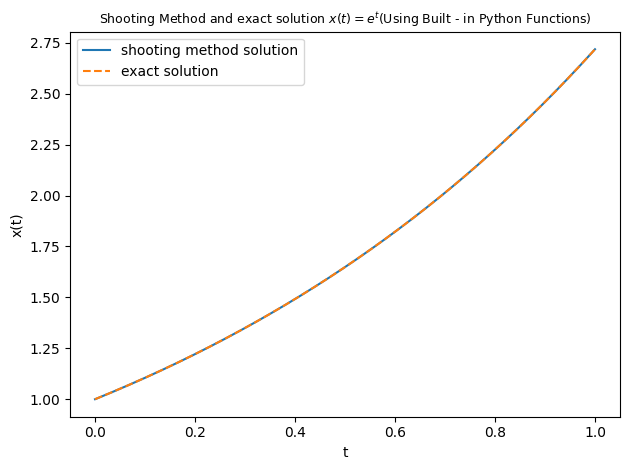

In [ ]:
#Plotting the solution
plt.plot(t_values, x_values, label = 'shooting method solution')
plt.plot(t_values, np.exp(t_values), '--', label = 'exact solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Shooting Method and exact solution $x(t) = e^t$(Using Built - in Python Functions)', fontsize = 9)
plt.legend()
plt.tight_layout()
plt.show()

End

End

End